# 03_builtin_datasets — Iris 데이터셋 이해(EDA)와 내장 데이터 구조

목표
- scikit-learn 내장 데이터셋(Bunch)의 공통 구조를 이해
- Iris 데이터셋의 피처(꽃받침/꽃잎 길이·너비)와 타깃(3개 품종) 파악
- 간단 EDA로 클래스별 차이를 데이터로 확인

키는 보통 data, target, target_name, feature_names, DESCR로 구성
개별 키가 가리키는 의미는 다음과 같습니다.
* data는
* target
* target_names는
* feature_names는
* DESCR은

In [3]:
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
print(f"feature_names: {iris_data.feature_names}")
print(f"target_names : {iris_data.target_names}")
print(f"data shape   : {iris_data.data.shape}")
print(f"target shape : {iris_data.target.shape}")

feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_names : ['setosa' 'versicolor' 'virginica']
data shape   : (150, 4)
target shape : (150,)


## 피처(특성)와 타깃(품종) 의미
- sepal length (cm): 꽃받침 길이
- sepal width  (cm): 꽃받침 너비
- petal length (cm): 꽃잎 길이
- petal width  (cm): 꽃잎 너비

타깃(label)
- 0 = setosa
- 1 = versicolor
- 2 = virginica

메시지: 피처의 **물리적 의미**를 알아야, 모델 결과도 해석할 수 있다.

In [6]:
import pandas as pd

df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df["label"] = iris_data.target
label_map = {i: name for i, name in enumerate(iris_data.target_names)}
df["species"] = df["label"].map(label_map)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
display(df.describe())
display(df["species"].value_counts())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [8]:
display(
    df.groupby("species")[iris_data.feature_names].mean().round(2)
)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.01,3.43,1.46,0.25
versicolor,5.94,2.77,4.26,1.33
virginica,6.59,2.97,5.55,2.03


In [9]:
# import seaborn as sns
# import matplotlib.pyplot as plt
#
# sns.scatterplot(
#     data=df, x="petal length (cm)", y="petal width (cm)", hue="species"
# )
# plt.title("Iris: Petal length vs width")
# plt.show()


import plotly.express as px

fig = px.scatter(
    df,
    x="petal length (cm)",
    y="petal width (cm)",
    color="species",
    title="Iris: 꽃잎 길이 대 너비"
)
fig.show()

In [22]:
fig = px.scatter(
    df,
    x="sepal length (cm)",
    y="sepal width (cm)",
    color="species",
    title="Iris: 꽃받침 길이 대 너비"
)
fig.show()

In [23]:
# sns.histplot(
#     data=df, x="sepal length (cm)", hue="species",
#     element="step", stat="density", common_norm=False
# )
# plt.title("Iris: Sepal length distribution by species")
# plt.show()

fig = px.histogram(
    df,
    x="sepal length (cm)",
    color="species",
    barmode="overlay",
    nbins=20,
    title="Iris"
)
fig.update_traces(opacity=0.6)
fig.show()

/Users/kwim/Dev/05_sparta/02_lecture/01_data_track/04_machine_learning/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from font(s) Arial.

/Users/kwim/Dev/05_sparta/02_lecture/01_data_track/04_machine_learning/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) Arial.

/Users/kwim/Dev/05_sparta/02_lecture/01_data_track/04_machine_learning/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) Arial.

/Users/kwim/Dev/05_sparta/02_lecture/01_data_track/04_machine_learning/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) Arial.

/Users/kwim/Dev/05_sparta/02_lecture/01_data_track/04_machine_learning/venv/lib/python3.12/site-packages/IPython/core/pylabto

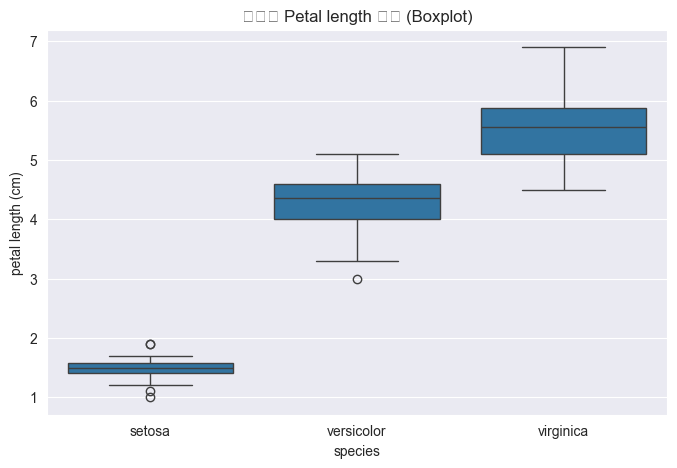

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="species", y="petal length (cm)")
plt.title("품종별 Petal length 분포 (Boxplot)")
plt.show()

## 요약
- setosa는 꽃잎 길이/너비가 매우 작아 쉽게 구분
- versicolor와 virginica는 꽃잎 분포가 일부 겹쳐 모델이 헷갈릴 수 있을 것 같은뎅?
- 품종별 평균/분포 차이를 확인했으므로, 이제 다음(04)에서 **데이터 분할/교차검증/그리드서치**로 모델 성능을 체계적으로 비교

In [25]:
import plotly.express as px

group_means = df.groupby("species")[iris_data.feature_names].mean()

fig = px.imshow(
    group_means,
    text_auto=True,
    aspect="auto",
    color_continuous_scale="Blues",
    title="품종별 평균 특성 (Heatmap)"
)

fig.update_xaxes(title="특성(feature)")
fig.update_yaxes(title="품종(species)")

fig.show()

In [26]:
from sklearn.datasets import load_breast_cancer, load_diabetes

bc = load_breast_cancer()
dia = load_diabetes()

print(f"Breast Cancer keys: {bc.keys()}")
print(f"Diabetes keys: {dia.keys()}")

Breast Cancer keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Diabetes keys: dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
